In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
import missingno as msno 

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.feature_selection import RFECV
from imblearn.under_sampling import RandomUnderSampler 

import statsmodels.api as sm

from tabulate import tabulate

# Import & Clean Data

In [11]:
infant_data=pd.read_csv("infants_all.csv")

/Users/ryanskeete/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [12]:
infant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16702 entries, 0 to 16701
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              16702 non-null  int64  
 1   patient_id              16702 non-null  int64  
 2   age.x                   16702 non-null  int64  
 3   gender.x                16702 non-null  object 
 4   race.x                  16677 non-null  object 
 5   ethnicity.x             16647 non-null  object 
 6   language                15365 non-null  object 
 7   encounter_id            16702 non-null  int64  
 8   encounter_class         16702 non-null  object 
 9   admit_type              12606 non-null  object 
 10  facility                16702 non-null  object 
 11  admit_source            12576 non-null  object 
 12  admit_date              16702 non-null  object 
 13  discharge_date          12617 non-null  object 
 14  disposition             11251 non-null

In [13]:
# drop duplicated columns
duplicated_cols=['gender.y','race.y','maritalstatus','age_cat','ethnicity.y','age.y',\
                'Race','Ethnicity']
infant_data.drop(duplicated_cols, axis=1, inplace=True)

In [14]:
# check the number of missing observations per column
nan_value = float("NaN")
infant_data.replace(" ", nan_value, inplace=True)
infant_data.isna().sum()

Unnamed: 0                    0
patient_id                    0
age.x                         0
gender.x                      0
race.x                       25
ethnicity.x                  55
language                   1337
encounter_id                  0
encounter_class               0
admit_type                 4096
facility                      0
admit_source               4126
admit_date                    0
discharge_date             4085
disposition                5451
discharge_notes            5451
reason_for_visit          13468
financial_class            3743
vip_indicator             16691
encounter_category            0
encounter_type             6627
encounter_description         0
encounter_code              330
encounter_code_method         0
encounter_priority         7663
file_number                   0
tract_fips                 2425
V1                            0
..PatientDemographicID        0
AuditCreateDateTime           0
AuditEffectiveDateTime        0
MPIPatie

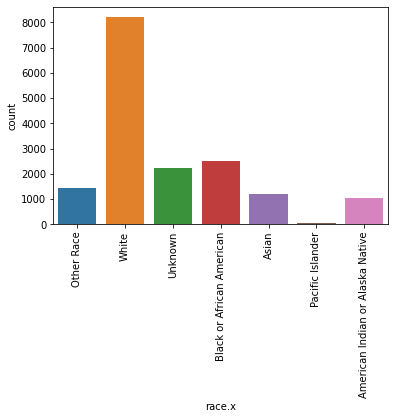

In [15]:
sns.countplot(x="race.x",data=infant_data)
plt.xticks(rotation = 90);

<AxesSubplot:xlabel='gender.x', ylabel='count'>

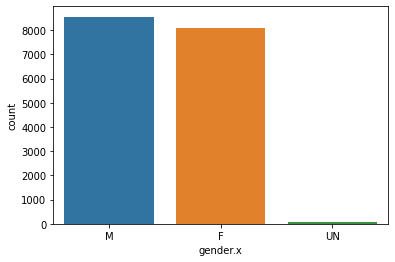

In [16]:
sns.countplot(x="gender.x",data=infant_data)

In [17]:
# create newdataframe with necessary columns only
df=infant_data[['DeceasedIndicator','race.x','gender.x','City','ZipCode','State',\
                'tract_fips','admit_date','discharge_date','encounter_code']]

In [18]:
# keep data for NC only
df=df[df.State=='NC']
df.shape

(16344, 10)

In [19]:
# check list of cities
df.City.unique()

array(['WILMINGTON', 'LELAND', 'HOLLY RIDGE', 'JACKSONVILLE', 'Hubert',
       'Midway Park', 'LUMBER BRIDGE', 'ROCKY POINT', 'BURGAW',
       'SHALLOTTE', 'CASTLE HAYNE', 'Sneads Ferry', 'CAROLINA BEACH',
       'ROCKY MOUNT', 'HAMPSTEAD', 'TARAWA TERRACE', 'ARAPAHOE',
       'ELIZABETHTOWN', 'WHITEVILLE', 'SOUTHPORT', 'Willard', 'WINNABOW',
       'TABOR CITY', 'MIDWAY PARK', 'Leland', 'ROSE HILL', 'Jacksonville',
       'FAYETTEVILLE', 'ATKINSON', 'RICHLANDS', 'MAXTON', 'SNEADS FERRY',
       'NAVASSA', 'BOLIVIA', 'LUMBERTON', 'RED SPRINGS', 'ROWLAND',
       'RICHLAND', 'SAINT PAULS', 'PARKTON', 'BLADENBORO', 'WILLARD',
       'OCEAN ISLE BEACH', 'PEMBROKE', 'RAEFORD', 'FAIRMONT', 'SHANNON',
       'ORRUM', 'EVERGREEN', 'LAURINBURG', 'WAGRAM', 'HENDERSON',
       'CHADBOURN', 'CLARKTON', 'LAKE WACCAMAW', 'Swansboro',
       'Beulaville', 'Hampstead', 'Maysville', 'Richlands', 'Stella',
       'Maple Hill', 'HALLSBORO', 'CLINTON', 'Wilmington', 'DELCO',
       'HUBERT', 'CALABASH', 

In [20]:
# clean city list
df['City']=df['City'].str.upper()
df['City'].replace("28405","", inplace=True)
df['City'].replace(np.nan,"", inplace=True)
df.loc[df.City=='Atlantic BCH',"City"]='ATLANTIC BEACH'
df.loc[df.City=='BURGAQ',"City"]='BURGAW'
df.loc[df.City=='CAMP LEJUENE',"City"]='CAMP LEJEUNE'
df.loc[df.City=='CAROLINA BCH',"City"]='CAROLINA BEACH'
df.loc[df.City=='EMERALD ISE',"City"]='EMERALD ISLE'
df.loc[df.City=='FAYETTVILLE',"City"]='FAYETTEVILLE'
df.loc[df.City=='JACKONVILLE',"City"]='JACKSONVILLE'
df.loc[df.City=='POLLOCKSVILL',"City"]='POLLOCKSVILLE'
df.loc[df.City=='RICHALNDS',"City"]='RICHLANDS'
df.loc[df.City=='RICHLAND',"City"]='RICHLANDS'
df.loc[df.City=='TARAWA TER',"City"]='TARAWA TERRACE'
df.loc[df.City=='TARAWA TERRA',"City"]='TARAWA TERRACE'
df.loc[df.City=='WILM',"City"]='WILMINGTON'

In [21]:
# convert date string to python datetime format
df['discharge_date'] = pd.to_datetime(df['discharge_date'])
df['admit_date'] = pd.to_datetime(df['admit_date'])

# create duration feature
df['Hosp_duration']=df.discharge_date-df.admit_date

In [22]:
# drop unnecessary features
df.drop(['State','admit_date','discharge_date'],axis=1, inplace=True)

In [23]:
# print percentage of missing observations of each feature
df.isnull().sum()/len(df)*100

DeceasedIndicator     0.000000
race.x                0.134606
gender.x              0.000000
City                  0.000000
ZipCode               0.097895
tract_fips           13.846060
encounter_code        1.970142
Hosp_duration        24.492168
dtype: float64

In [24]:
# Impute mode into missing values for each categorical data field with missing values.

cat_impute = ["race.x", "ZipCode", "tract_fips", "encounter_code", "Hosp_duration"] 
for col in cat_impute:
    mode = df[col].mode()
    df[col].fillna(mode.values[0], inplace=True)

In [25]:
# convert duration feature into days
df['Hosp_duration_days']=df.Hosp_duration.astype(int)/86400000000000

In [26]:
# drop unnecessary feature
df.drop("Hosp_duration",axis=1, inplace=True)

In [27]:
# One-hot encode all categorical variables
df_dummies = pd.get_dummies(df, columns=['race.x','gender.x','City','tract_fips',\
                                            'encounter_code'],drop_first=True)

In [28]:
# drop zip code feature since not needed for modelling
df_dummies.drop("ZipCode", axis=1, inplace=True)

In [29]:
df_dummies.shape

(16344, 2444)

# Train/Test Split

In [30]:
# Data cleaning is complete.
# Create X and y dataframes for train-test splits

X = df_dummies.drop("DeceasedIndicator", axis=1)
y = df_dummies["DeceasedIndicator"]

In [31]:
# For models that require scaled data, create a scaled X dataframe

scl = StandardScaler()
X_scl = pd.DataFrame(scl.fit_transform(X),columns=X.columns)

In [32]:
#TRAIN/TEST SPLIT
TEST_SIZE = 0.20 

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 


RANDOM_STATE = 101

In [34]:
# use StratifiedShuffleSplit() to maintain ratio of deaths to total infants in train
# and test datasets
sss = StratifiedShuffleSplit(n_splits=4, test_size=TEST_SIZE,
                             random_state=RANDOM_STATE)

for train_index, test_index in sss.split(X_scl, y):
    X_train_scl, X_test_scl = X_scl.iloc[train_index], X_scl.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [35]:
y_train.value_counts(normalize=True), y_test.value_counts(normalize=True)

(0    0.997782
 1    0.002218
 Name: DeceasedIndicator, dtype: float64,
 0    0.997859
 1    0.002141
 Name: DeceasedIndicator, dtype: float64)

In [36]:
y_train.value_counts(), y_test.value_counts()

(0    13046
 1       29
 Name: DeceasedIndicator, dtype: int64,
 0    3262
 1       7
 Name: DeceasedIndicator, dtype: int64)

In [37]:
# undersampling the majority class(es) by randomly picking samples without replacement
# to create new training sets
from imblearn.under_sampling import RandomUnderSampler 
rus = RandomUnderSampler(random_state=42, replacement=True)
X_res_scl, y_res = rus.fit_resample(X_train_scl, y_train)

In [38]:
y_res.value_counts()

0    29
1    29
Name: DeceasedIndicator, dtype: int64

# Logistic Regression

In [39]:
clf = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000)
params={'C': [0.5,0.7,1,2,5], 'solver':['newton-cg','lbfgs']}
grid_search = GridSearchCV(clf , params,cv=NUMBER_KFOLDS, verbose = 1,\
                           scoring='f1', n_jobs=-1)

grid_search.fit(X_res_scl,y_res)
print("best k",grid_search.best_params_,"bestscore",grid_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
best k {'C': 0.5, 'solver': 'newton-cg'} bestscore 0.6204761904761904


In [40]:
grid_search.score(X_test_scl, y_test)

0.026315789473684213

In [41]:
# print classification report
predictions = grid_search.predict(X_test_scl)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96      3262
           1       0.01      0.43      0.03         7

    accuracy                           0.93      3269
   macro avg       0.51      0.68      0.50      3269
weighted avg       1.00      0.93      0.96      3269



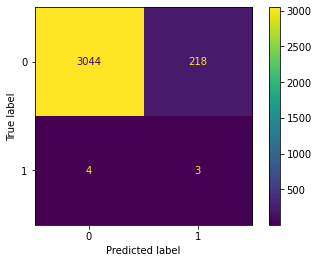

In [43]:
# display confusion matrix
cm=confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['0','1'])
disp.plot();

**Recursive Feature Selection 
It removes features one at a time based on the weights given by a model of our choice in each iteration.**

In [44]:
# select 12 features
num_features=12

In [45]:
# create variable list
data_final_vars=X.columns.values.tolist()

In [46]:
# find best 12 features
from sklearn.feature_selection import RFE

logreg = LogisticRegression(max_iter=1000, n_jobs=-1, solver='newton-cg')

rfe = RFE(logreg, n_features_to_select=num_features)
rfe = rfe.fit(X_res_scl, y_res.values.ravel())
print(rfe.support_) # the mask of selected features

print(rfe.ranking_)

[False False False ... False False False]
[  76   73   60 ... 1675  690 2432]


In [47]:
# the 12 selected features
X_res_scl.loc[:, rfe.support_].columns

Index(['City_CASTLE HAYNE', 'tract_fips_37019020405.0',
       'tract_fips_37133002202.0', 'encounter_code_02H633Z',
       'encounter_code_02HV33Z', 'encounter_code_04HY32Z',
       'encounter_code_06H033T', 'encounter_code_0BH17EZ',
       'encounter_code_6A600ZZ', 'encounter_code_K219',
       'encounter_code_P07.38', 'encounter_code_P700'],
      dtype='object')

In [48]:
# optimal parameters for logistic regression
clf = LogisticRegression(random_state=RANDOM_STATE, max_iter=1000, C=0.5, solver='newton-cg')

In [49]:
# fit on 12 selected features
clf.fit(X_res_scl.loc[:, rfe.support_],y_res)
clf.score(X_test_scl.loc[:, rfe.support_], y_test)

0.964515142245335

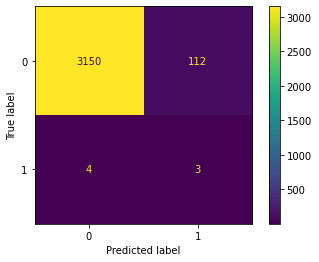

In [50]:
# display confusion matrix
predictions = clf.predict(X_test_scl.loc[:, rfe.support_])
cm=confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot();

In [51]:
# print classification report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      3262
           1       0.03      0.43      0.05         7

    accuracy                           0.96      3269
   macro avg       0.51      0.70      0.52      3269
weighted avg       1.00      0.96      0.98      3269



In [52]:
# print regression coefficients
clf.coef_

array([[ 0.34101691,  0.20865068,  0.37004358,  0.18971376,  0.34804475,
         0.21135736,  0.27797874,  0.28683968, -0.48760291,  0.28460605,
        -0.24326815, -0.2138507 ]])

In [53]:
# Used statmodels library to get pvalues for a similar model to the one above
X2 = sm.add_constant(X_res_scl.loc[:, rfe.support_])
logit_model=sm.Logit(y_res,X2.values).fit_regularized(maxiter=1000,\
                                                       alpha=0.5)

print(logit_model.summary())

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.4206792910975412
            Iterations: 36
            Function evaluations: 36
            Gradient evaluations: 36
                           Logit Regression Results                           
Dep. Variable:      DeceasedIndicator   No. Observations:                   58
Model:                          Logit   Df Residuals:                       45
Method:                           MLE   Df Model:                           12
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.4461
Time:                        00:01:42   Log-Likelihood:                -22.270
converged:                       True   LL-Null:                       -40.203
Covariance Type:            nonrobust   LLR p-value:                 0.0003405
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------


# Decision Tree

In [54]:
# use StratifiedShuffleSplit() to maintain ratio of deaths to total infants in train
# and test datasets
sss = StratifiedShuffleSplit(n_splits=4, test_size=TEST_SIZE,
                             random_state=RANDOM_STATE)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [55]:
y_train.value_counts(), y_test.value_counts()

(0    13046
 1       29
 Name: DeceasedIndicator, dtype: int64,
 0    3262
 1       7
 Name: DeceasedIndicator, dtype: int64)

In [56]:
# Train on a resampled dataset

rus = RandomUnderSampler(random_state=42, replacement=True)
X_res, y_res = rus.fit_resample(X_train, y_train)

In [57]:
y_res.value_counts()

0    29
1    29
Name: DeceasedIndicator, dtype: int64

In [65]:
# find optimal decision tree
dtree = DecisionTreeClassifier(random_state=RANDOM_STATE)
params={'criterion':['gini','entropy'], 'splitter':['best','random'], 'max_features':['auto', 'sqrt', 'log2',None],\
       'max_depth':list(range(1, 6))}
grid_search = GridSearchCV(dtree, params, cv=NUMBER_KFOLDS, verbose = 1, scoring='f1', n_jobs=-1)
grid_search.fit(X_res,y_res)
print("best k",grid_search.best_params_,"bestscore",grid_search.best_score_)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
best k {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'splitter': 'best'} bestscore 0.6585858585858585


In [66]:
grid_search.score(X_test, y_test)

0.008356545961002786

In [67]:
predictions = grid_search.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.56      0.72      3262
           1       0.00      0.86      0.01         7

    accuracy                           0.56      3269
   macro avg       0.50      0.71      0.36      3269
weighted avg       1.00      0.56      0.72      3269



In [68]:
# save name of features as a list
features = list(X_train.columns)

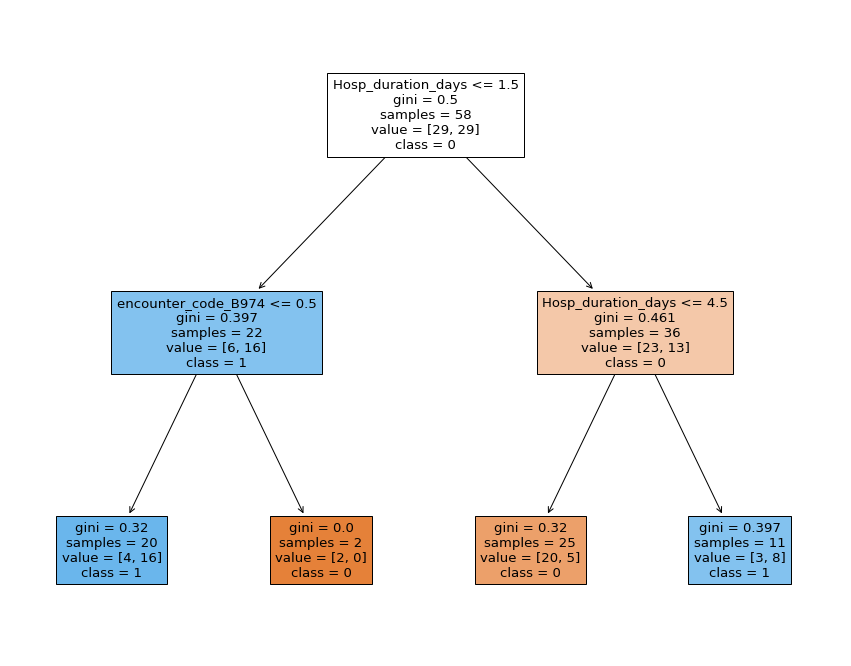

In [70]:
# display decision tree

# optimal parameters for DT
dtree = DecisionTreeClassifier(criterion= 'gini', max_features= None,\
                               splitter= 'best',random_state=RANDOM_STATE,\
                              max_depth=2)
dtree.fit(X_res,y_res)
label_cat=['0','1']
plt.figure(figsize=(15,12))
tree.plot_tree(dtree, feature_names=features, class_names=label_cat, filled=True);

In [71]:
# display 10 most important features
importances = pd.DataFrame({'feature':X_train.columns,\
                            'importance':np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances[:10]

,feature,importance
0,Hosp_duration_days,0.773
990,encounter_code_B974,0.227
1631,encounter_code_P0518,0.000
1624,encounter_code_P05.19,0.000
1625,encounter_code_P05.9,0.000
1626,encounter_code_P0506,0.000
1627,encounter_code_P0507,0.000
1628,encounter_code_P0508,0.000
1629,encounter_code_P0510,0.000
1630,encounter_code_P0517,0.000


In [72]:
# try max_depth=3 because the tree above DT doesn't yield much information
dtree = DecisionTreeClassifier(max_depth=3,min_samples_leaf=1,splitter= 'best',\
                               random_state=RANDOM_STATE,criterion= 'gini')
dtree.fit(X_res, y_res)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.61      0.76      3262
           1       0.00      0.86      0.01         7

    accuracy                           0.61      3269
   macro avg       0.50      0.73      0.38      3269
weighted avg       1.00      0.61      0.76      3269



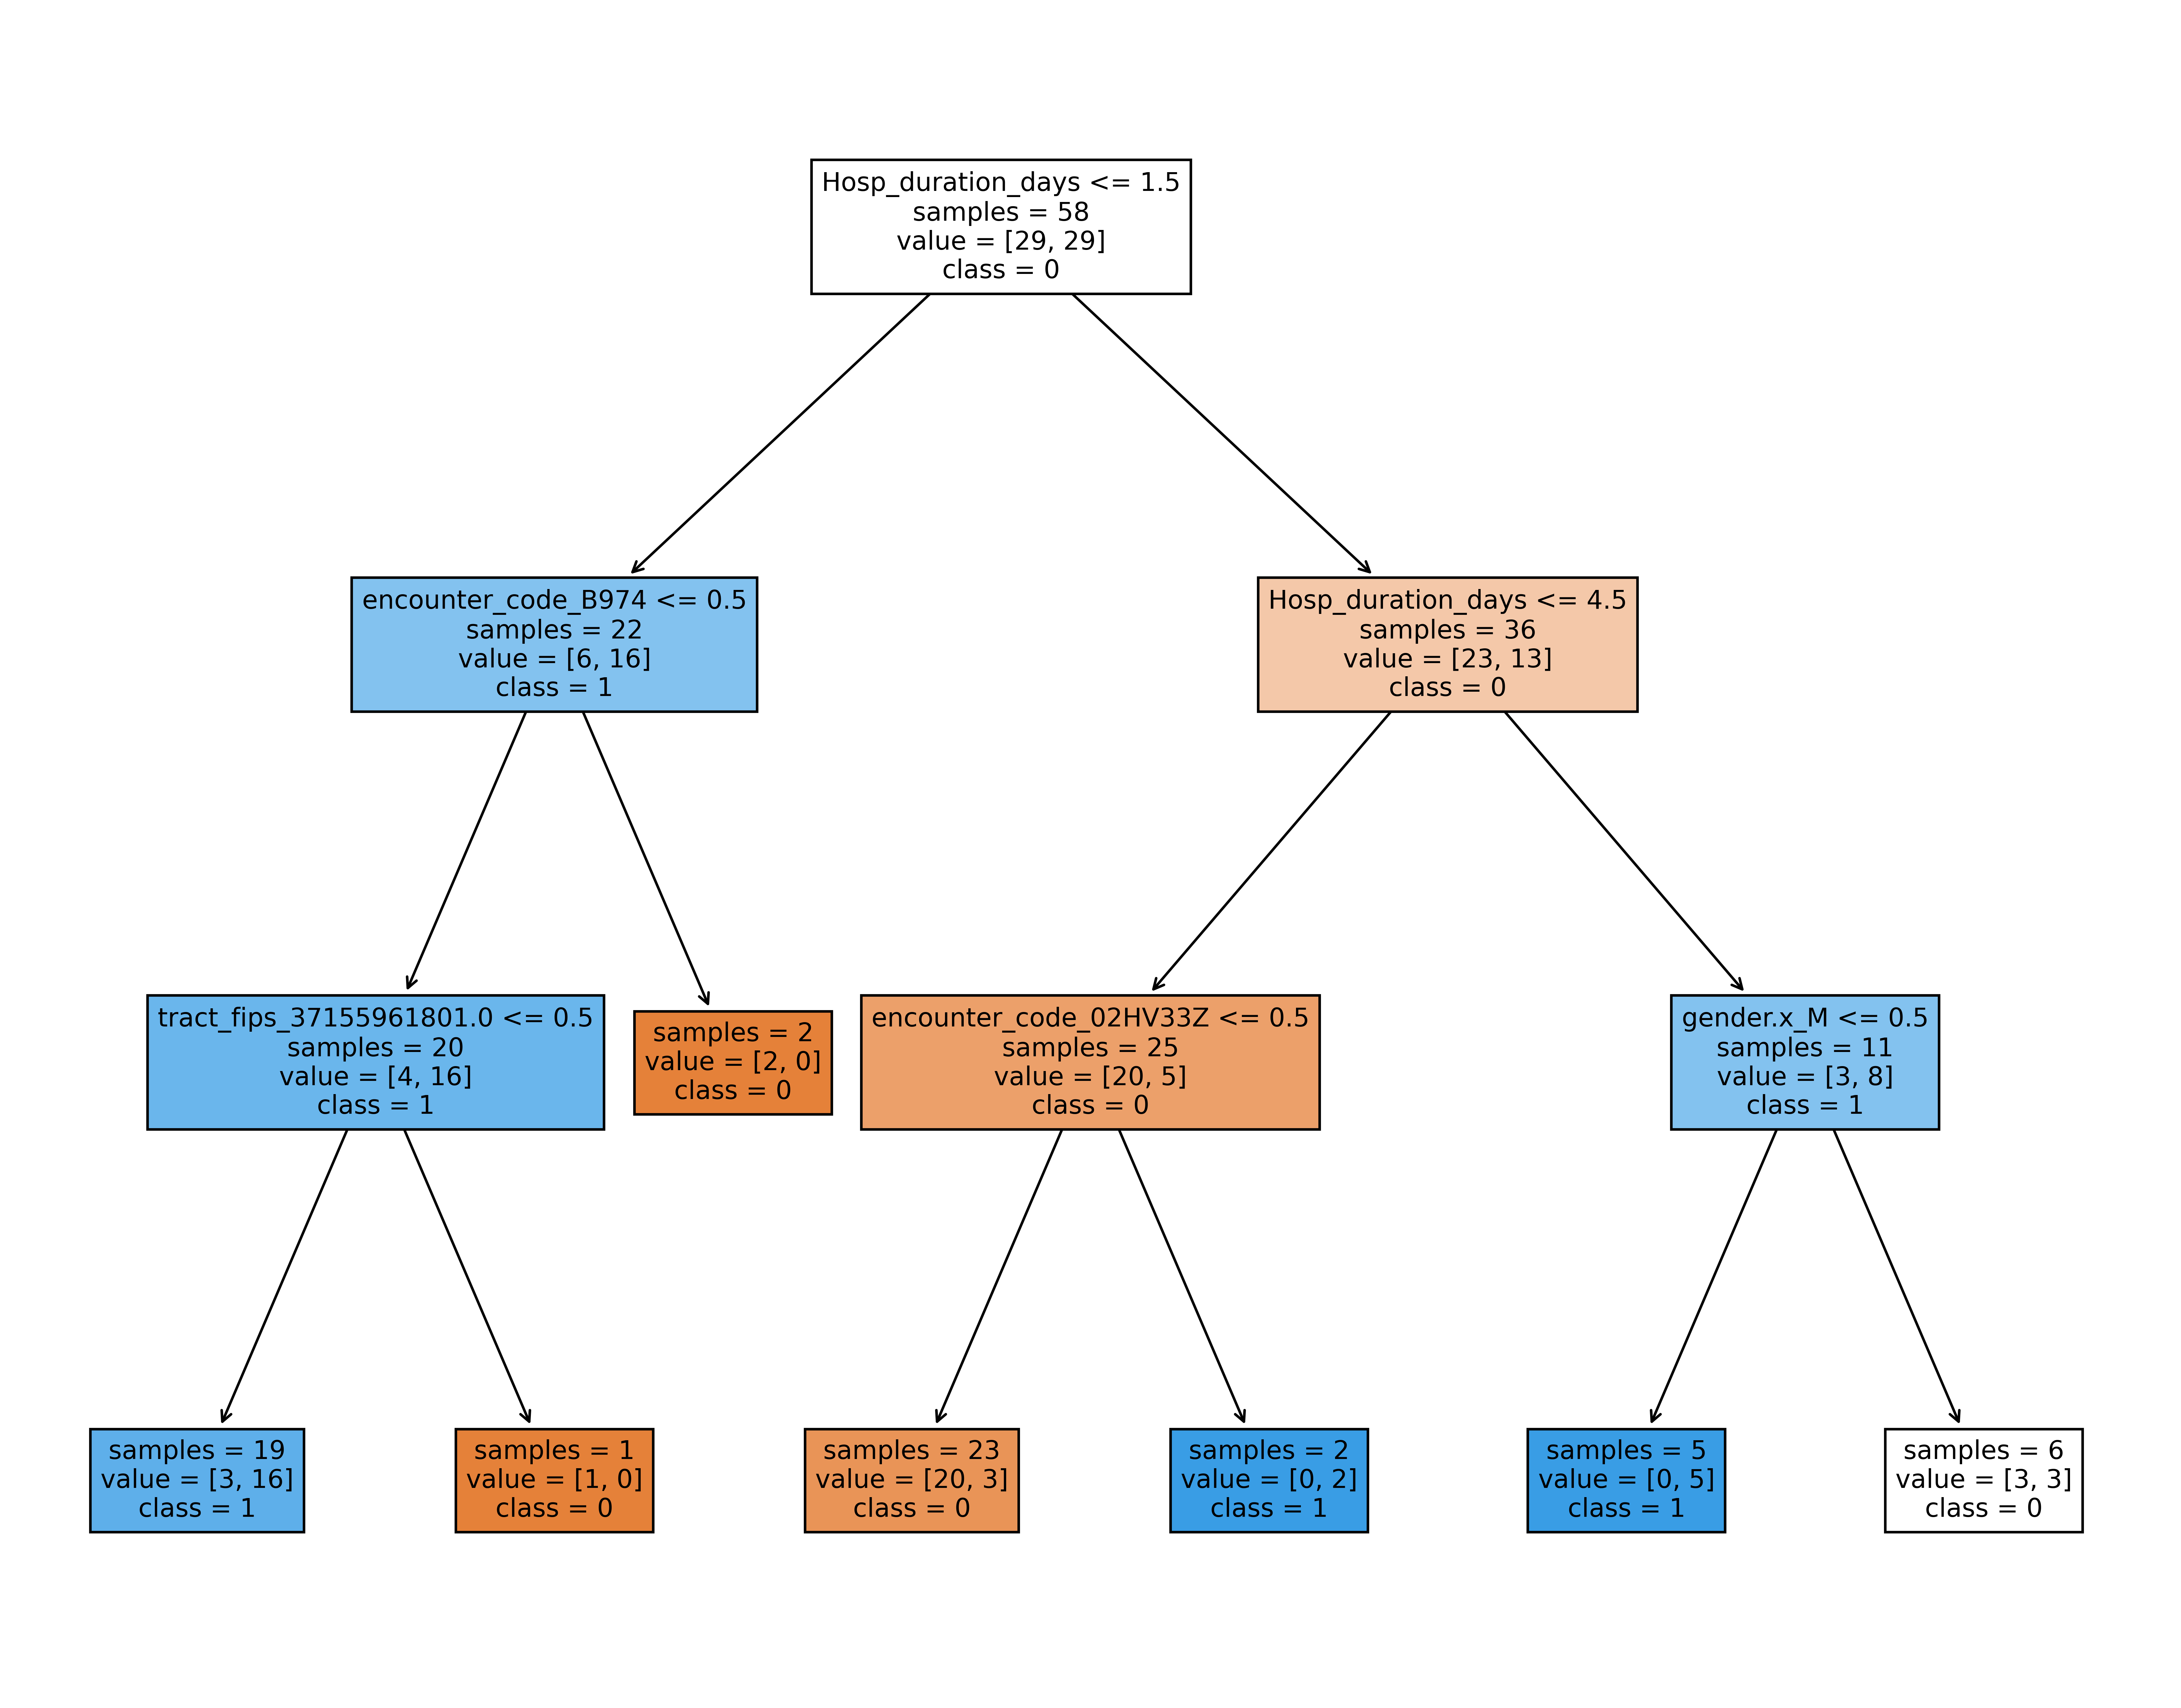

In [73]:
label_cat=['0','1']
plt.figure(figsize=(15,12),dpi=600.0)
tree.plot_tree(dtree, feature_names=features, class_names=label_cat,\
               filled=True, fontsize=10, impurity=False);

In [74]:
# print DT representation
text_representation = tree.export_text(dtree,feature_names=features)
print(text_representation)

|--- Hosp_duration_days <= 1.50
|   |--- encounter_code_B974 <= 0.50
|   |   |--- tract_fips_37155961801.0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- tract_fips_37155961801.0 >  0.50
|   |   |   |--- class: 0
|   |--- encounter_code_B974 >  0.50
|   |   |--- class: 0
|--- Hosp_duration_days >  1.50
|   |--- Hosp_duration_days <= 4.50
|   |   |--- encounter_code_02HV33Z <= 0.50
|   |   |   |--- class: 0
|   |   |--- encounter_code_02HV33Z >  0.50
|   |   |   |--- class: 1
|   |--- Hosp_duration_days >  4.50
|   |   |--- gender.x_M <= 0.50
|   |   |   |--- class: 1
|   |   |--- gender.x_M >  0.50
|   |   |   |--- class: 0



In [76]:
from sklearn.tree import _tree

def get_rules(tree, feature_names, class_names):
    '''Prints decision tree rules in human readable (if-then statements) format'''
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [77]:
# print DT rules in "If-then" format
rules = get_rules(dtree, features, label_cat)
for r in rules:
    print(r)

if (Hosp_duration_days > 1.5) and (Hosp_duration_days <= 4.5) and (encounter_code_02HV33Z <= 0.5) then class: 0 (proba: 86.96%) | based on 23 samples
if (Hosp_duration_days <= 1.5) and (encounter_code_B974 <= 0.5) and (tract_fips_37155961801.0 <= 0.5) then class: 1 (proba: 84.21%) | based on 19 samples
if (Hosp_duration_days > 1.5) and (Hosp_duration_days > 4.5) and (gender.x_M > 0.5) then class: 0 (proba: 50.0%) | based on 6 samples
if (Hosp_duration_days > 1.5) and (Hosp_duration_days > 4.5) and (gender.x_M <= 0.5) then class: 1 (proba: 100.0%) | based on 5 samples
if (Hosp_duration_days > 1.5) and (Hosp_duration_days <= 4.5) and (encounter_code_02HV33Z > 0.5) then class: 1 (proba: 100.0%) | based on 2 samples
if (Hosp_duration_days <= 1.5) and (encounter_code_B974 > 0.5) then class: 0 (proba: 100.0%) | based on 2 samples
if (Hosp_duration_days <= 1.5) and (encounter_code_B974 <= 0.5) and (tract_fips_37155961801.0 > 0.5) then class: 0 (proba: 100.0%) | based on 1 samples


In [79]:
# Most important features
importances = pd.DataFrame({'feature':X_train.columns,\
                            'importance':np.round(dtree.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances[:5]

,feature,importance
0,Hosp_duration_days,0.503
666,encounter_code_02HV33Z,0.177
990,encounter_code_B974,0.148
7,gender.x_M,0.087
586,tract_fips_37155961801.0,0.086


In [80]:
# create table of most important features
print(tabulate(importances[:5],headers=['Variable','Importance Weight'],\
               tablefmt='fancy_grid'))

╒═════╤══════════════════════════╤═════════════════════╕
│     │ Variable                 │   Importance Weight │
╞═════╪══════════════════════════╪═════════════════════╡
│   0 │ Hosp_duration_days       │               0.503 │
├─────┼──────────────────────────┼─────────────────────┤
│ 666 │ encounter_code_02HV33Z   │               0.177 │
├─────┼──────────────────────────┼─────────────────────┤
│ 990 │ encounter_code_B974      │               0.148 │
├─────┼──────────────────────────┼─────────────────────┤
│   7 │ gender.x_M               │               0.087 │
├─────┼──────────────────────────┼─────────────────────┤
│ 586 │ tract_fips_37155961801.0 │               0.086 │
╘═════╧══════════════════════════╧═════════════════════╛


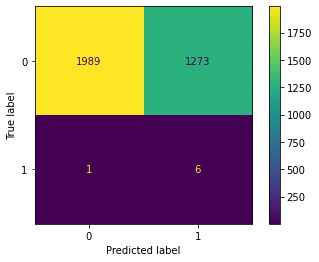

In [81]:
# Display confusion matrix
cm=confusion_matrix(y_test,predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=dtree.classes_)
disp.plot();